In [1]:
import pandas as pd
import os
import requests
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import json
% matplotlib inline
import seaborn as sns


## Gathering Data

### Given File

In [2]:
archive=pd.read_csv('twitter-archive-enhanced.csv')

### File downloaded programmaticlly

In [3]:
url=('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
file_name=url.split('/')[-1]
response=requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name,mode='wb') as f:
        f.write(response.content)

images=pd.read_csv('image-predictions.tsv', sep = '\t')
        

### Twitter API

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'


auth =tweepy.OAuthHandler('hidden', 'hidden')
auth.set_access_token('616640721-vZHqT0clkRF2xwl6ijFavJFOJRj0Qe2EGS4DzFYS','hidden')

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)



In [5]:
exp_tweet = api.get_status(archive.tweet_id[1000], tweet_mode = 'extended')
content= exp_tweet._json
print(content)

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016', 'id': 747963614829678593, 'id_str': '747963614829678593', 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q', 'truncated': False, 'display_text_range': [0, 70], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 747963600220917761, 'id_str': '747963600220917761', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'url': 'https://t.co/ZPfeRtOX0Q', 'display_url': 'pic.twitter.com/ZPfeRtOX0Q', 'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 937, 'h': 632, 'resize': 'fit'}, 'small': {'w': 680, 'h': 459, 'resize': 'fit'}, 'large': {'w': 937, 'h': 632, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 74796

In [6]:
content.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [7]:
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)


In [8]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df= pd.DataFrame(df_list)
api_df.sample(10)

,favorite_count,retweet_count,tweet_id,user_count
257,19292,5318,841320156043304961,8918557
1163,2601,503,718460005985447936,8918584
984,3584,1022,747594051852075008,8918581
1547,2368,813,687704180304273409,8918584
1329,3176,1098,703769065844768768,8918583
359,12394,2863,828372645993398273,8918556
446,0,3341,817502432452313088,8918556
815,15756,5274,767754930266464257,8918558
597,0,7186,796563435802726400,8918557
2151,942,433,669203728096960512,8918612


## Assessment


In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1867,675334060156301312,NaN,NaN,2015-12-11 15:19:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good morning here's a grass pupper. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675334060...,12,10,None,None,None,pupper,None
1150,726224900189511680,NaN,NaN,2016-04-30 01:41:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm getting super heckin frustrated with you a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726224900...,9,10,None,None,None,None,None
1146,727155742655025152,NaN,NaN,2016-05-02 15:20:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When you're trying to enjoy yourself but end u...,NaN,NaN,NaN,https://vine.co/v/ixa1ejbXiM7,11,10,None,None,None,None,None
2302,667012601033924608,NaN,NaN,2015-11-18 16:12:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He laughs a lot. Very cool dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667012601...,9,10,Klevin,None,None,None,None
2237,668142349051129856,NaN,NaN,2015-11-21 19:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pup is Oliver. Hops around. Has wings...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668142349...,2,10,None,None,None,None,None


In [11]:
archive.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [12]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Daisy          7
an             7
Bailey         7
Toby           7
Rusty          6
Jax            6
Dave           6
Stanley        6
Jack           6
Scout          6
Bella          6
Koda           6
Leo            6
Milo           6
Oscar          6
Alfie          5
            ... 
Buddah         1
Aldrick        1
Ferg           1
DayZ           1
Joshwa         1
Harnold        1
Hanz           1
Blanket        1
Steve          1
Cermet         1
Rambo          1
Farfle         1
Callie         1
Bradlay        1
Bobbay         1
Leonard        1
Arnold         1
Strider        1
Poppy          1
Monty          1
Stephanus      1
Sandra         1
Beya           1
Jeffrie        1
Naphaniel      1
Godzilla       1
Ralphie        1
Furzey        

In [13]:
archive['rating_numerator'].value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
sum(images.duplicated())

0

In [17]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet_id          2331 non-null int64
user_count        2331 non-null int64
dtypes: int64(4)
memory usage: 72.9 KB


### Tidiness Issues

##### 1-Merge all Dataframes together

#### 2- 1 Variable 'Dog Stage' for 4 coloumns (doggo, floofer, pupper, and puppo)

### Quality Issues


#### Archive DataFrame

##### 1- tweet id is integer
##### 2-remove retweets
##### 3-timestamp is object
##### 4-some names are innacurate
##### 5-none instead of NaN
##### 6-unnesseary columns
##### 7-Rename some columns
##### 8- missing urls
##### 9- rating column for data analysis

#### Images DataFrame

##### 10- change Id column to object in both APIs df and images df
##### 11- dataframe doesn't contain breed column and many columns for same thing and columns can be dropped

## Clean

In [48]:
archive_clean =archive.copy()
images_clean = images.copy()
api_df_clean = api_df.copy()

## Quality Issue 1

### Define
#### Issue: Tweet id is integer
#### Solution: change tweet id to object

### Code

In [72]:
archive_clean['tweet_id']=archive_clean['tweet_id'].astype(str)

### Test


In [73]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 257.8+ KB


## Quality Issue 2

### Define
#### Issue: Data contain retweets
#### Solution: Remove retweets

### Code

In [74]:
archive_clean =archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]


In [75]:
archive_clean=archive_clean.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

### Test

In [76]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 203.9+ KB


## Quality Issue 3

### Define
#### Issue: timestamp is Object
#### Solution: Change timestamp to datetime

### Code

In [77]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")


## Test

In [78]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 203.9+ KB


## Quality Issue 4 and 5


### Define
#### Issue: some names are innacurate - None as string instead of NaN
#### Solution: Replace it with Nan

## Code

In [79]:
not_name=[]
for row in archive_clean['name']:
    if row[0].islower() and row not in not_name:
        not_name.append(row)
print(not_name)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [80]:
archive_clean['name'].replace(not_name, 
                        np.nan,
                       inplace = True)


In [81]:
archive_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

### Test

In [82]:
archive_clean['name'].value_counts()

Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Sadie         8
Lola          8
Winston       8
Daisy         7
Toby          7
Bo            6
Bailey        6
Koda          6
Oscar         6
Stanley       6
Jax           6
Bella         6
Leo           5
Bentley       5
Milo          5
Louis         5
Buddy         5
Rusty         5
Scout         5
Dave          5
Chester       5
Alfie         4
Winnie        4
Larry         4
             ..
Timofy        1
Kevon         1
Crimson       1
Corey         1
Sundance      1
Stephan       1
Jeffrie       1
Beya          1
Callie        1
Chevy         1
Julio         1
Spencer       1
Traviss       1
Hero          1
Blanket       1
Cermet        1
Rambo         1
Farfle        1
Bradlay       1
Sandra        1
Bobbay        1
Leonard       1
Arnold        1
Logan         1
Strider       1
Steve         1
Poppy         1
Seamus        1
Stephanus     1
Cheryl        1
Name: name, Length: 930,

## Quality Issue 6 and 7

### Define
#### Issue: Many columns are not important - some columns names can be shorter
#### Solution: drop undesired columns - rename columns to be easier in reading

### Code


In [83]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [84]:
archive_clean.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source'], axis=1, inplace=True)

In [85]:
archive_clean.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)

In [86]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'numerator',
       'denominator', 'name', 'dog_stage'],
      dtype='object')

## Quality Issue 8

### Define
#### Issue: missing urls
#### Solution: add missing urls programmatically

### Code

In [87]:
def added_urls(row):
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        tweet_id = row['tweet_id']
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        return row
    
archive_clean=archive_clean.apply(added_urls,axis=1)    
            
        
    

### Test

In [88]:
archive_clean['expanded_urls'].isnull().any()

False

## Quality Issue 9 

### Define 
#### Issue: the is no column for calculated Ratings
#### Solution: Add column 'Ratings' for further analysis

### Code

In [89]:
archive_clean['Ratings']=10*archive_clean['numerator'] / archive_clean['denominator']

### Test

In [90]:
archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,numerator,denominator,name,dog_stage,Ratings
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,13.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,13.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,12.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,13.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,12.0


## Quality Issue 10 (image prediction&API's )

### Define
#### issue: id column is integer 
#### Solution: change id to object to merge image dataframe and archive dataframe

### Code


In [91]:
images_clean['tweet_id']=images_clean['tweet_id'].astype(str)
api_df_clean['tweet_id']=api_df_clean['tweet_id'].astype(str)

### Test

In [92]:
images_clean.info()
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 13 columns):
tweet_id           1751 non-null object
jpg_url            1751 non-null object
p1                 1751 non-null object
p1_conf            1751 non-null float64
p1_dog             1751 non-null bool
p2                 1751 non-null object
p2_conf            1751 non-null float64
p2_dog             1751 non-null bool
p3                 1751 non-null object
p3_conf            1751 non-null float64
p3_dog             1751 non-null bool
breed              1751 non-null object
confidence_list    1751 non-null object
dtypes: bool(3), float64(3), object(7)
memory usage: 155.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet_id          2331 non-null object
user_count        2331 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


## Quality Issue 11 (Image Prediction)

### Define
#### Issue: dataframe doesn't contain breed column and many columns for same thing and columns can be dropped
#### Solution: create new column for dog breed and one column for confidence leved and drop unused columns

In [93]:
breed = []
confidence_list = []

def image(images_clean):
    if images_clean['p1_dog'] == True:
        breed.append(images_clean['p1'])
        confidence_list.append(images_clean['p1_conf'])
    elif images_clean['p2_dog'] == True:
        breed.append(images_clean['p2'])
        confidence_list.append(images_clean['p2_conf'])
    elif images_clean['p3_dog'] == True:
        breed.append(images_clean['p3'])
        confidence_list.append(images_clean['p3_conf'])
    else:
        breed.append('Error')
        confidence_list.append('Error')

images_clean.apply(image, axis=1)

images_clean['breed'] = breed
images_clean['confidence_list'] = confidence_list

In [94]:
images_clean = images_clean[images_clean['breed'] != 'Error']
# drop unused columns
images_clean = images_clean.drop(['img_num'],1)

KeyError: "['img_num'] not found in axis"

### Test

In [95]:
images_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed', 'confidence_list'],
      dtype='object')

## Tidiness Issue 1

### Define
#### Issue: four different columns identify 1 variable
#### Solution: merge four columns in one column 'dog_stage' 

### Code

In [96]:
archive_clean['dog_stage'] = archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')


In [97]:
archive_clean[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(20)


KeyError: "['doggo' 'floofer' 'pupper' 'puppo'] not in index"

In [98]:
archive_clean=archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


KeyError: "['doggo' 'floofer' 'pupper' 'puppo'] not found in axis"

### Test

In [99]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id         2175 non-null object
timestamp        2175 non-null datetime64[ns]
text             2175 non-null object
expanded_urls    2175 non-null object
numerator        2175 non-null int64
denominator      2175 non-null int64
name             1391 non-null object
dog_stage        364 non-null object
Ratings          2175 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 169.9+ KB


## Tidiness Issue 2

### Define
#### Issue: all Dataframes have the same observtional unit
#### Solution: Merge all dataframes

### Code


In [100]:
twitter1= pd.merge(archive_clean, 
                      images_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
twitter1 =twitter1[twitter1['jpg_url'].notnull()]
#merge api dataframe with them
master_df= pd.merge(twitter1, api_df_clean, 
                      how = 'left', on = ['tweet_id'])


### Test

In [101]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 24 columns):
tweet_id           1686 non-null object
timestamp          1686 non-null datetime64[ns]
text               1686 non-null object
expanded_urls      1686 non-null object
numerator          1686 non-null int64
denominator        1686 non-null int64
name               1187 non-null object
dog_stage          274 non-null object
Ratings            1686 non-null float64
jpg_url            1686 non-null object
p1                 1686 non-null object
p1_conf            1686 non-null float64
p1_dog             1686 non-null object
p2                 1686 non-null object
p2_conf            1686 non-null float64
p2_dog             1686 non-null object
p3                 1686 non-null object
p3_conf            1686 non-null float64
p3_dog             1686 non-null object
breed              1686 non-null object
confidence_list    1686 non-null float64
favorite_count     1679 non-null float64
re

## Storing Data


In [102]:
master_df.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analysing and Visualizing Data

In [103]:
master_df=pd.read_csv('twitter_archive_master.csv')

### Insight 1 
#### Relation between Retweet counts and Ratings

(0, 16)

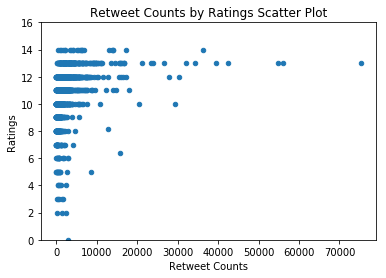

In [104]:
master_df.plot(x='retweet_count', y='Ratings', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')
fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');
plt.ylim((0,16))


## Isight 2

### The most common dog in the dataset

In [105]:
master_df['breed'].value_counts()


golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Samoyed                            42
Pomeranian                         42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
Staffordshire_bullterrier          21
beagle                             20
Shih-Tzu                           20
Siberian_husky                     20
Shetland_sheepdog                  19
Rottweiler                         19
Maltese_dog                        19
Lakeland_terrier                   18
kuvasz                             18
basset      

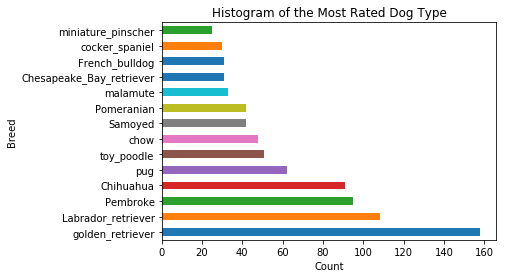

In [106]:
breed_df= master_df.groupby('breed').filter(lambda x: len(x) >= 25)

breed_df['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Breed')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

## Insight 3 
### which dog have the lowest average rating

In [107]:
breed_df_mean = master_df.groupby('breed').mean()
breed_df_mean.head()

,tweet_id,numerator,denominator,Ratings,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,confidence_list,favorite_count,retweet_count,user_count
breed,,,,,,,,,,,,,,
Afghan_hound,8.041621e+17,9.666667,10.0,9.666667,0.433959,1.0000,0.099034,1.000000,0.081651,0.666667,0.433959,15393.666667,5053.333333,8.918558e+06
Airedale,7.184489e+17,9.833333,10.0,9.833333,0.583771,1.0000,0.129887,0.916667,0.083516,0.916667,0.583771,4703.166667,1185.666667,8.918639e+06
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,10.312500,0.641898,0.8125,0.146242,0.937500,0.052138,0.937500,0.527359,7530.333333,1751.266667,8.918575e+06
Appenzeller,7.939334e+17,11.000000,10.0,11.000000,0.503665,1.0000,0.152041,1.000000,0.130708,0.500000,0.503665,6535.500000,1220.500000,8.918570e+06
Australian_terrier,7.785921e+17,11.500000,10.0,11.500000,0.307584,1.0000,0.242234,1.000000,0.115970,1.000000,0.307584,9957.500000,2645.500000,8.918570e+06


In [108]:
breed_df_sorted=breed_df_mean['Ratings'].sort_values()
breed_df_sorted

breed
Japanese_spaniel                5.000000
soft-coated_wheaten_terrier     8.800000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.333333
Boston_bull                     9.416667
Welsh_springer_spaniel          9.500000
Maltese_dog                     9.526316
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
Afghan_hound                    9.666667
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Great_Dane                      9.818182
Airedale                        9.833333
Saint_Bernard                   9.857143
Newfoundland                    9.857143
Mexican_hairless                9.857143
English_setter                  9.875000
miniature_poodle                9.875000
Irish_terrier                  10.000000
miniature_

In [109]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 24 columns):
tweet_id           1686 non-null int64
timestamp          1686 non-null object
text               1686 non-null object
expanded_urls      1686 non-null object
numerator          1686 non-null int64
denominator        1686 non-null int64
name               1187 non-null object
dog_stage          274 non-null object
Ratings            1686 non-null float64
jpg_url            1686 non-null object
p1                 1686 non-null object
p1_conf            1686 non-null float64
p1_dog             1686 non-null bool
p2                 1686 non-null object
p2_conf            1686 non-null float64
p2_dog             1686 non-null bool
p3                 1686 non-null object
p3_conf            1686 non-null float64
p3_dog             1686 non-null bool
breed              1686 non-null object
confidence_list    1686 non-null float64
favorite_count     1679 non-null float64
retweet_count    